In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
# import io
# import requests
import seaborn as sns

%matplotlib inline

### Загрузить файл auto.csv

In [2]:
df = pd.read_csv("auto.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение) 

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,126.365854,35.438400,65.00,101.00,122.00,150.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.324878,0.273049,2.54,3.13,3.31,3.58,3.94
stroke,205.0,3.253366,0.313937,2.07,3.11,3.29,3.41,4.17


In [4]:
# Мода
df.mode().T

,0,1
symboling,0,NaN
normalized-losses,161,NaN
make,toyota,NaN
fuel-type,gas,NaN
aspiration,std,NaN
num-of-doors,four,NaN
body-style,sedan,NaN
drive-wheels,fwd,NaN
engine-location,front,NaN
wheel-base,94.5,NaN


In [5]:
numerical_values = ([
    "symboling",
    "normalized-losses",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-size",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price"
    ])
print(len(numerical_values))

16


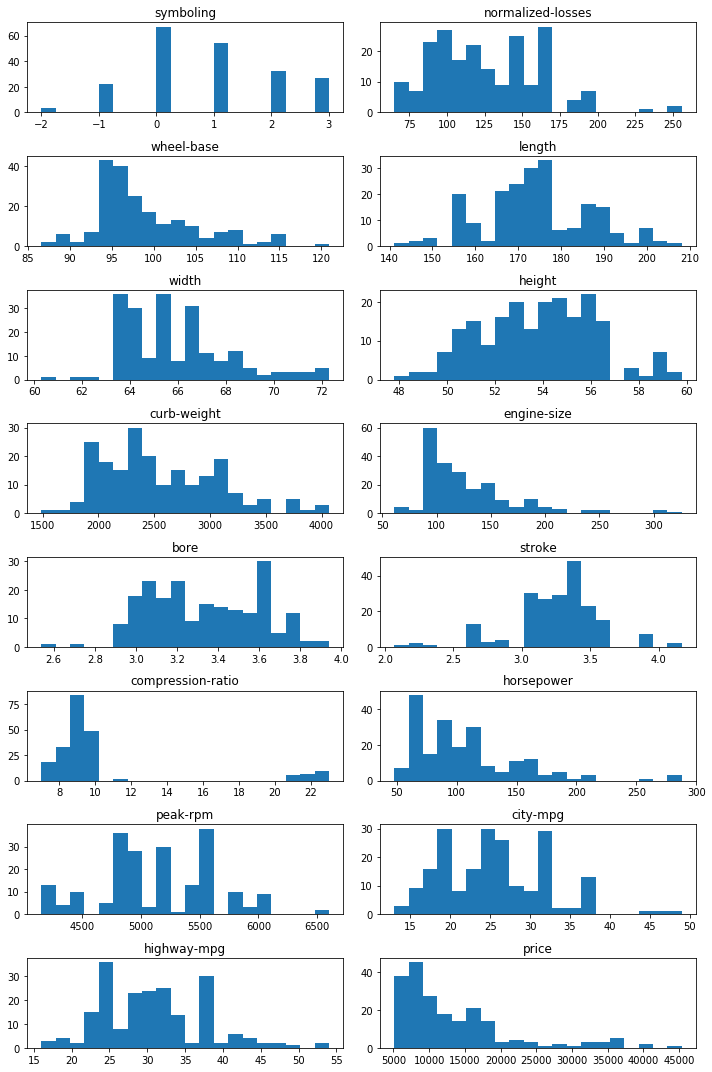

In [6]:
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 15))
ax = axes.flatten()
for n, axis in enumerate(ax):
    ax[n].hist(df[numerical_values].iloc[:,n], bins=20)
    ax[n].set_title(df[numerical_values].iloc[:,n].name)
plt.tight_layout()

### Рассчитать и визуализировать корреляционную матрицу для переменных

In [7]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


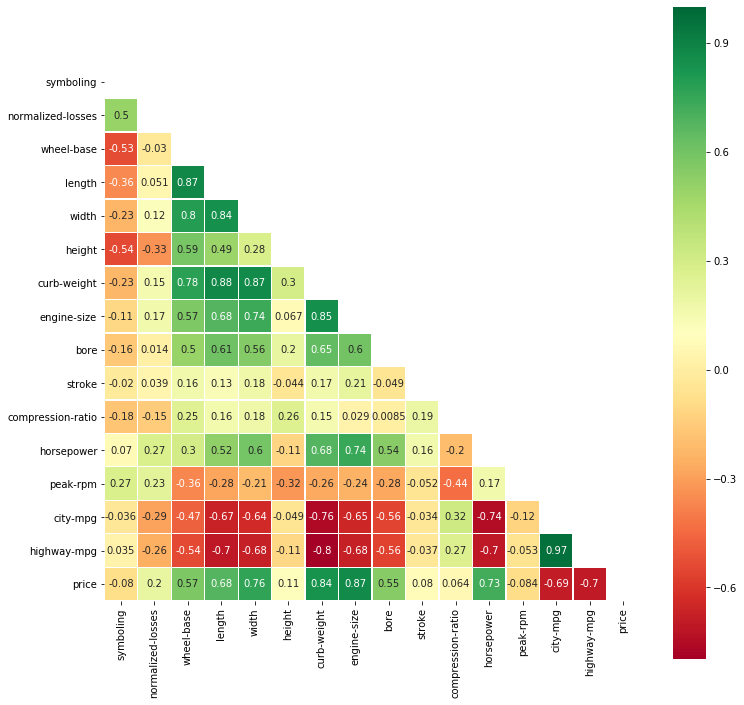

In [8]:
plt.figure(figsize = (12,12))

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=corr, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.2, square=True)
plt.show()

In [9]:
strong_corr = corr                              \
                .mask(mask)                     \
                .mask(abs(corr)<=0.6)           \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()

mid_corr = corr \
                .mask(mask)                     \
                .mask(abs(corr)<=0.3)           \
                .mask(abs(corr)>0.6)            \
                .unstack()                      \
                .sort_values()                  \
                .sort_values(ascending = False) \
                .dropna()

corr_dict = ({
            "Сильные корреляции (0.6 <= x < 1)"  : strong_corr,
            "Средние корреляции (0.3 < x < 0.6):": mid_corr
            })

for corr_lvl, corr_data in corr_dict.items():
    print(corr_lvl)
    for key, value in corr_data.items():
        param1 = "|" + key[0].replace('\n',' ') + "|" 
        param2 = "|" + key[1].replace('\n',' ') + "|" 
        print(f"{param1} to {param2}: {value:1.3f}")
    print() 

Сильные корреляции (0.6 <= x < 1)
|city-mpg| to |highway-mpg|: 0.971
|length| to |curb-weight|: 0.878
|wheel-base| to |length|: 0.875
|engine-size| to |price|: 0.871
|width| to |curb-weight|: 0.867
|curb-weight| to |engine-size|: 0.851
|length| to |width|: 0.841
|curb-weight| to |price|: 0.836
|wheel-base| to |width|: 0.795
|wheel-base| to |curb-weight|: 0.776
|width| to |price|: 0.765
|engine-size| to |horsepower|: 0.742
|width| to |engine-size|: 0.735
|horsepower| to |price|: 0.725
|length| to |engine-size|: 0.683
|curb-weight| to |horsepower|: 0.680
|length| to |price|: 0.679
|curb-weight| to |bore|: 0.648
|length| to |bore|: 0.609
|engine-size| to |bore|: 0.603
|width| to |city-mpg|: -0.643
|engine-size| to |city-mpg|: -0.654
|length| to |city-mpg|: -0.671
|width| to |highway-mpg|: -0.677
|engine-size| to |highway-mpg|: -0.677
|city-mpg| to |price|: -0.691
|highway-mpg| to |price|: -0.698
|horsepower| to |highway-mpg|: -0.699
|length| to |highway-mpg|: -0.705
|horsepower| to |city-

### Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis 

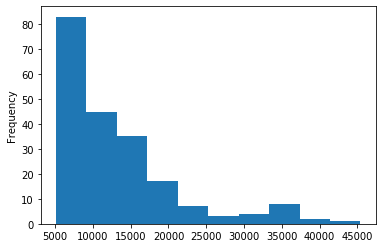

In [10]:
df["price"].plot(kind="hist")

In [11]:
df["price"].skew()

1.7663998888191028

In [12]:
df["price"].kurtosis()

2.948637293212561

### Визуализировать несколько взаимосвязей между переменными 

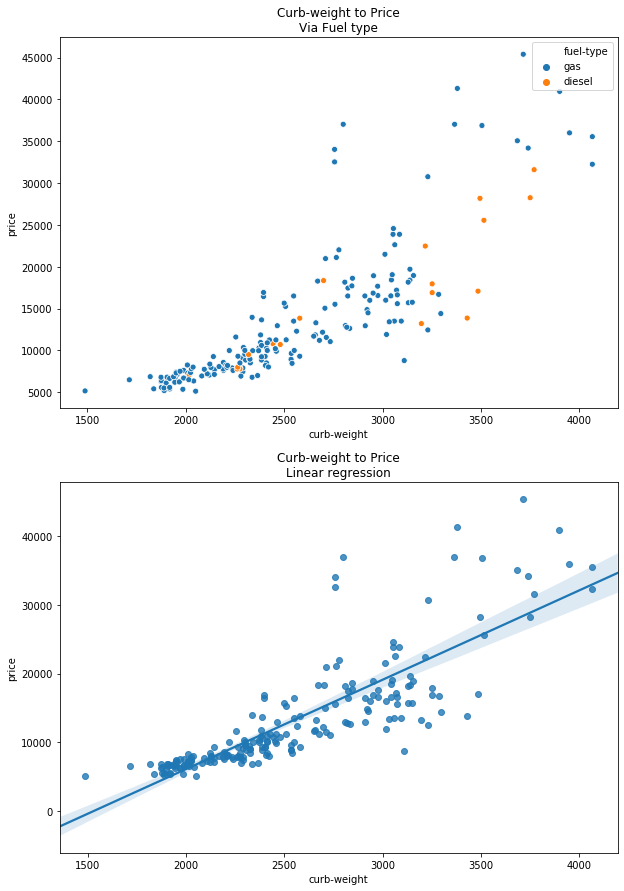

In [13]:
# |curb-weight| to |price|: 0.836
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
ax = axes.flatten()

sns.scatterplot(x="curb-weight", y="price", data=df, hue="fuel-type", ax=ax[0])
sns.regplot(x="curb-weight", y="price", data=df, ax=ax[1])
ax[0].set_title("Curb-weight to Price\nVia Fuel type")
ax[1].set_title("Curb-weight to Price\nLinear regression")
plt.show()

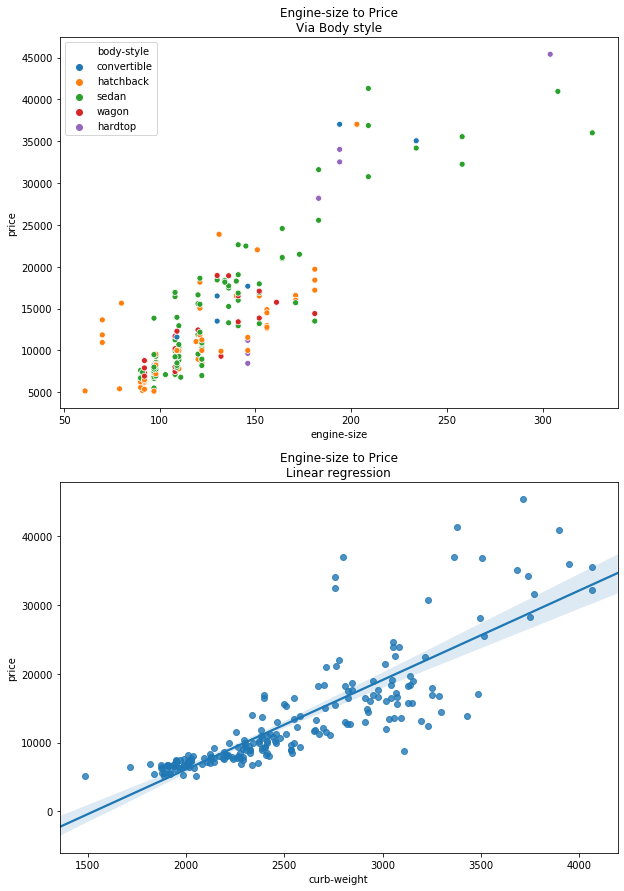

In [14]:
# |engine-size| to |price|
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
ax = axes.flatten()

sns.scatterplot(x="engine-size", y="price", data=df, hue="body-style", ax=ax[0])
sns.regplot(x="curb-weight", y="price", data=df, ax=ax[1])

ax[0].set_title("Engine-size to Price\nVia Body style")
ax[1].set_title("Engine-size to Price\nLinear regression")
plt.show()

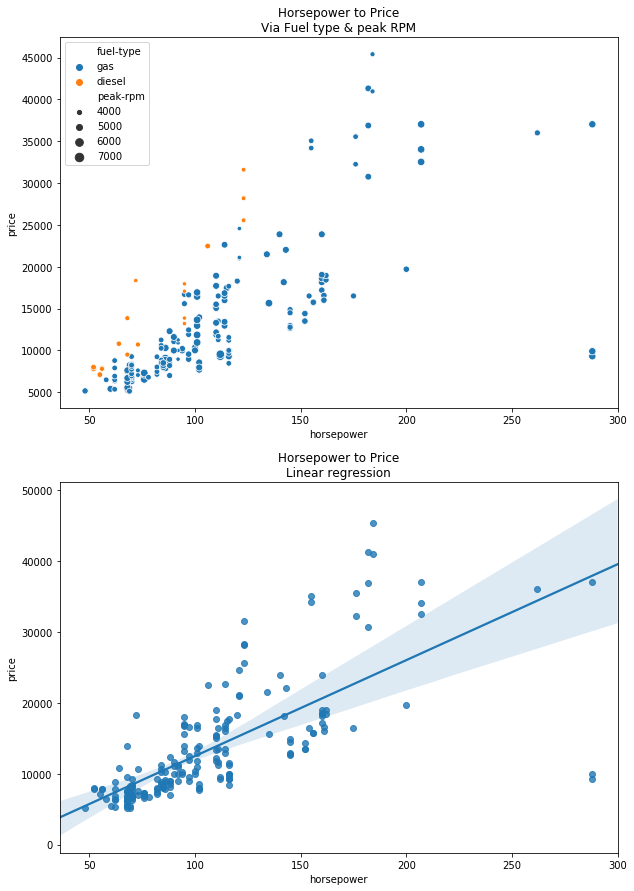

In [15]:
# |horsepower| to |price|: 0.725
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
ax = axes.flatten()

sns.scatterplot(x="horsepower", y="price", data=df, hue="fuel-type", size="peak-rpm", ax=ax[0])
sns.regplot(x="horsepower", y="price", data=df, ax=ax[1])

ax[0].set_title("Horsepower to Price\nVia Fuel type & peak RPM")
ax[1].set_title("Horsepower to Price\nLinear regression")
plt.show()

#### Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.


1. Преположим, что существуют различия в распределении лошадиных сил у машин с бензиновыми и дизельными двигателями.

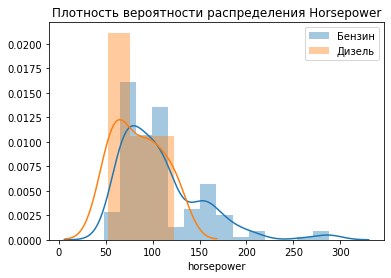

In [16]:
gas_cars_hp = df[df["fuel-type"] == "gas"]["horsepower"]
diesel_cars_hp = df[df["fuel-type"] == "diesel"]["horsepower"]
sns.distplot(gas_cars_hp)
sns.distplot(diesel_cars_hp)
plt.title('Плотность вероятности распределения Horsepower')
plt.legend(['Бензин', 'Дизель'])
plt.show()


Проверим с помощью T-критерия:

In [17]:
stats.ttest_ind(gas_cars_hp, diesel_cars_hp)

Ttest_indResult(statistic=2.365344076957992, pvalue=0.01895573258080751)

T-value = 2.365, P = 0.0189, гипотеза о различии в распределении в выборках принимается.

С другой стороны, данные не распределены нормально, что ставит под сомнение адекватность применения тут T-критерия...
Попробуем применить критерий Манна-Уитни:

In [18]:
stats.mannwhitneyu(gas_cars_hp, diesel_cars_hp)

MannwhitneyuResult(statistic=1255.0, pvalue=0.009120964483653305)

По критерию Манна-Уитни различия существуют, уровень значимости P = 0.0091, следовательно, гипотеза о различии в распределении принимается.

2. Предположим, что колесная база (Wheel-base) различна у машин с дизельными и с бензиновыми двигателями.

Посмотрим на распределение:

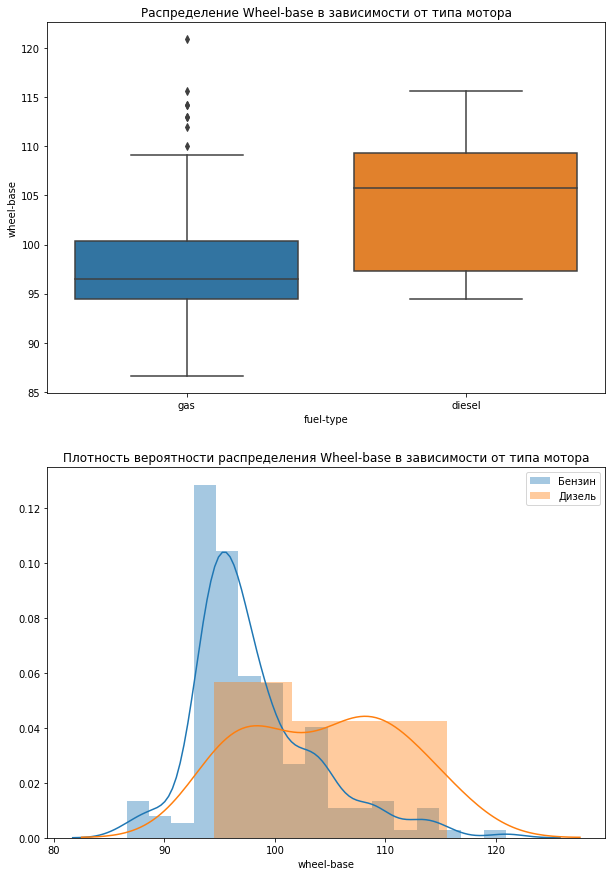

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 15))
ax = axes.flatten()

sns.boxplot(x="fuel-type", y="wheel-base", data=df, ax=ax[0])
ax[0].set_title('Распределение Wheel-base в зависимости от типа мотора')

gas_cars_wb = df[df["fuel-type"] == "gas"]["wheel-base"]
diesel_cars_wb = df[df["fuel-type"] == "diesel"]["wheel-base"]
sns.distplot(gas_cars_wb, ax=ax[1])
sns.distplot(diesel_cars_wb, ax=ax[1])
plt.title('Плотность вероятности распределения Wheel-base в зависимости от типа мотора')
plt.legend(['Бензин', 'Дизель'])
plt.show()


"Окинув газом", видим значимые различия.
Но все-же, проверим статистически

T-критерий:

In [20]:
stats.ttest_ind(gas_cars_wb, diesel_cars_wb)

Ttest_indResult(statistic=-4.618281178773126, pvalue=6.8618665003079764e-06)

Критерий Манна-Уитни:

In [21]:
stats.mannwhitneyu(gas_cars_wb, diesel_cars_wb)

MannwhitneyuResult(statistic=855.5, pvalue=3.9191402999312725e-05)

На удивление, P-значение велико с использованием обоих критериев.
Следовательно, отбросить нулевую гипотезу о различии в распрделении мы не можем.
Вероятно, если мы вс же уверены, что разница существует, нампридется уравнивать коичество наблюдений - бензиновых машин у нас гораздо больше, чем дизельных:

In [22]:
print(len(gas_cars_wb), len(diesel_cars_wb))

185 20


The end